In [1]:
#importing the needed libraries
import datetime, calendar
from decimal import Decimal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
df

,address,eth_balance,wei_int,ether
0,0x00000000219ab540356cbb839cbe05303d7705fa,1.002810e+25,10028099999999999889899520,10028099.99999999988989952
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,7.101470e+24,7101469999999999769837568,7101469.999999999769837568
2,0xda9dfa130df4de4673b89022ee50ff26f6ea73cf,2.113030e+24,2113029999999999927123968,2113029.999999999927123968
3,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,1.996010e+24,1996009999999999976407040,1996009.99999999997640704
4,0x73bceb1cd57c711feac4224d062b0f6ff338501e,1.993500e+24,1993500000000000084934656,1993500.000000000084934656
...,...,...,...,...
15995,0x5cdb405484b37006ef66fb339c89f1e789e5dfb0,3.285840e+20,328584000000000000000,328.584
15996,0x0eeeb243e1122a8f39ab3f96fde43d36bf4f9a14,3.284810e+20,328480999999999967232,328.480999999999967232
15997,0x86c06f627e9282fc75196c6aff900bedbcd1e4e4,3.284680e+20,328468000000000000000,328.468
15998,0xdb0e89a9b003a28a4055ef772e345e8089987bfd,3.284550e+20,328455000000000032768,328.455000000000032768


In [3]:
df.describe()

,eth_balance
count,1.600000e+04
mean,6.298282e+21
std,1.045540e+23
min,3.284010e+20
25%,4.840143e+20
50%,8.000000e+20
75%,1.899113e+21
max,1.002810e+25


In [4]:
low_bal_wallet = df.iloc[-1]
#lowest balance
lowestbalance = low_bal_wallet.eth_balance
#ether balances are measured in wei
print(f"Wallet containing the lowest balance {lowestbalance} wei")

Wallet containing the lowest balance 3.28401e+20 wei


In [5]:
def weiNumpy_to_weiInt(wei_numpy):
    wei_int = int(wei_numpy)
    return wei_int

In [6]:
df["wei_int"] = df.eth_balance.apply(weiNumpy_to_weiInt)
df.head()

,address,eth_balance,wei_int
0,0x00000000219ab540356cbb839cbe05303d7705fa,1.002810e+25,10028099999999999889899520
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,7.101470e+24,7101469999999999769837568
2,0xda9dfa130df4de4673b89022ee50ff26f6ea73cf,2.113030e+24,2113029999999999927123968
3,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,1.996010e+24,1996009999999999976407040
4,0x73bceb1cd57c711feac4224d062b0f6ff338501e,1.993500e+24,1993500000000000084934656


In [7]:
df.wei_int.describe()

count                      16000
unique                     13805
top       1000000000000000000000
freq                         215
Name: wei_int, dtype: object

In [9]:
from web3 import Web3

In [10]:
high_bal_wallet = df.wei_int.iloc[0]
max_ether_bal = Web3.fromWei(high_bal_wallet, 'ether')
print(f"{max_ether_bal=}")

max_ether_bal=Decimal('10028099.99999999988989952')


In [11]:
wei_int_to_eth_dec = lambda wei_int : Web3.fromWei(wei_int, 'ether')
#creating the ether column
df['ether'] = df.wei_int.apply(wei_int_to_eth_dec)

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ether', ylabel='Relative-Percentage'>

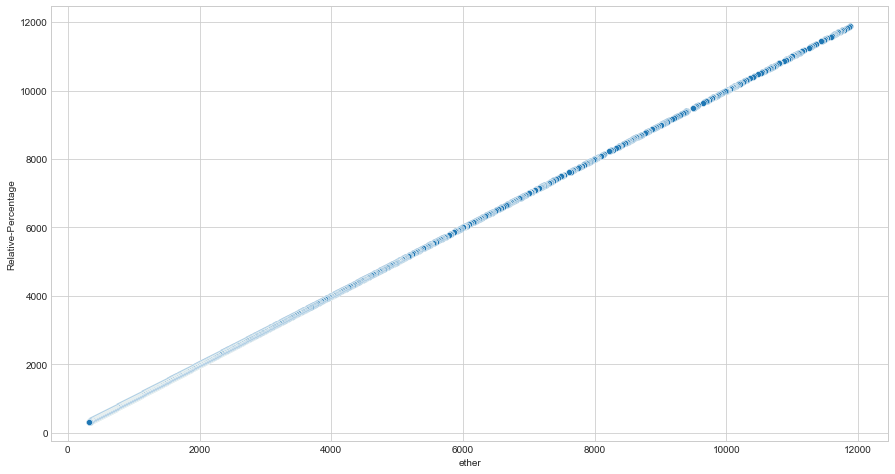

In [57]:
bins =df.ether.iloc[-15000:]
f,a = plt.subplots(figsize=(15,8))
a.set_ylabel('Relative-Percentage')
a.set_xlabel('ether')
sns.scatterplot(bins,df.ether.iloc[-15000:])

A scatter plot over this method results in less meaning, it can be intrepreted with a time series data instead to give a meaningful insight.